In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [11]:
df = pd.read_csv('diamond_cleaned.csv')
df = df.dropna()
print(df)

          carat     price         x         y         z
0      0.016667  0.000000  0.039783  0.053763  0.238318
1      0.005556  0.000000  0.028933  0.028674  0.210280
2      0.016667  0.000086  0.057866  0.069892  0.210280
3      0.050000  0.000692  0.084991  0.098566  0.285047
4      0.061111  0.000778  0.110307  0.120072  0.313084
...         ...       ...       ...       ...       ...
53935  0.288889  0.210258  0.365280  0.372760  0.488318
53936  0.288889  0.210258  0.354430  0.370968  0.514019
53937  0.277778  0.210258  0.349005  0.358423  0.502336
53938  0.366667  0.210258  0.437613  0.437276  0.544393
53939  0.305556  0.210258  0.379747  0.392473  0.521028

[49000 rows x 5 columns]


In [12]:
#TARGET - PRICE

In [13]:
X_data = df.drop('price',axis = 'columns')
Y_data = df.price
print(Y_data)
print(np.shape(Y_data))
print(X_data)
print(np.shape(X_data))

train_count = int(0.8*(len(X_data)))

X_train = X_data[:train_count]
X_test = X_data[train_count:]
Y_train = Y_data[:train_count]
Y_test = Y_data[train_count:]

print(np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))


coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
print(coefficients)
#coefficients = np.array([0.710528,-0.253474,0.537378,-0.146495])
print(np.shape(coefficients))
y_pred = X_test @ coefficients.values

0        0.000000
1        0.000000
2        0.000086
3        0.000692
4        0.000778
           ...   
53935    0.210258
53936    0.210258
53937    0.210258
53938    0.210258
53939    0.210258
Name: price, Length: 49000, dtype: float64
(49000,)
          carat         x         y         z
0      0.016667  0.039783  0.053763  0.238318
1      0.005556  0.028933  0.028674  0.210280
2      0.016667  0.057866  0.069892  0.210280
3      0.050000  0.084991  0.098566  0.285047
4      0.061111  0.110307  0.120072  0.313084
...         ...       ...       ...       ...
53935  0.288889  0.365280  0.372760  0.488318
53936  0.288889  0.354430  0.370968  0.514019
53937  0.277778  0.349005  0.358423  0.502336
53938  0.366667  0.437613  0.437276  0.544393
53939  0.305556  0.379747  0.392473  0.521028

[49000 rows x 4 columns]
(49000, 4)
(39200, 4) (9800, 4) (39200,) (9800,)
0    0.710528
1   -0.253474
2    0.537378
3   -0.146495
dtype: float64
(4,)


In [14]:
mse = np.mean((Y_test - y_pred) ** 2)
print('Loss value : ',mse)

Loss value :  0.003193590713125584


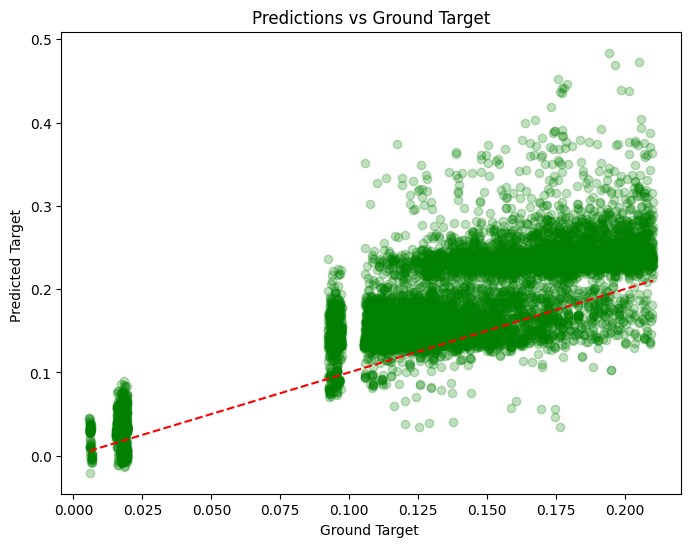

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, c='green', alpha=0.25)

plt.xlabel("Ground Target ")
plt.ylabel("Predicted Target ")
plt.title("Predictions vs Ground Target")

plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')

plt.show()

In [17]:
pickle_filename = 'linreg_diamonds.p'
model_info = {
    'coefficients': coefficients,  
    'Loss_value': mse  
}
with open(pickle_filename, 'wb') as file:
    pickle.dump(model_info,file)

In [18]:
pd.read_pickle(pickle_filename)

{'coefficients': 0    0.710528
 1   -0.253474
 2    0.537378
 3   -0.146495
 dtype: float64,
 'Loss_value': 0.003193590713125584}

In [19]:
with open(pickle_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print(loaded_model)

{'coefficients': 0    0.710528
1   -0.253474
2    0.537378
3   -0.146495
dtype: float64, 'Loss_value': 0.003193590713125584}
